In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Nodal Analysis With Python

In pressure terms, think about the journey of oil. It starts somwhere far in reservoir at an initial pressure. The reservoir deliverability, the reservoirs ability to deliver from itself from its stomach to the wellbore, is the IPR. We need to find out what's the reservoir capacity to deliver oil. 

The higher the Pwf, the easier the oil flows from reservoir to wellbore.

As fluid flows through porous media, it depletes oil's energy as it comes towards wellbore.

Once reservoir has delivered fludis to the foot of the well, known as bottom hole, taking oil from there to the surface is called tubing performance relationship or vertical lift performance (VLP).

If you know curve of IPR and VLP, concept of nodal analysis says that: at that particular node, the pressure must be one.

In [28]:
#Get IPR Data Set
q_ipr = [0,1999,3094,3902,4512,4963,5275,5458,5519]
pwf_ipr = [4000,3500,3000,2500,2000,1500,1000,500,14.7]

# for better practice, put it in NumPy array
ipr_df  = pd.DataFrame({'Pwf':[4000,35000,3000,2500,2000,1500,1000,500,14.7], 
                        'Q': [0,1999,3094,3902,4512,4963,5275,5458,5519]})

#Create Dictionary
ipr = {'Pwf':pwf_ipr,
       'Q': q_ipr}


In [10]:
ipr_df

,Pwf,Q
0,4000.0,0
1,35000.0,1999
2,3000.0,3094
3,2500.0,3902
4,2000.0,4512
5,1500.0,4963
6,1000.0,5275
7,500.0,5458
8,14.7,5519


Text(0.5, 1.0, 'IPR curve')

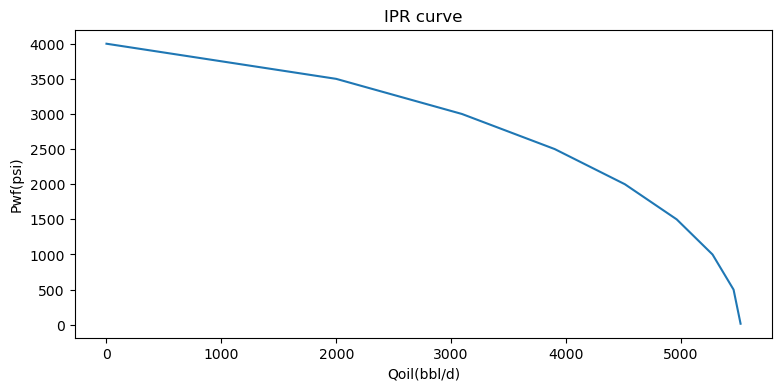

In [170]:
x_ipr = q_ipr ; y_ipr = pwf_ipr

plt.figure(figsize = (9,4))
plt.plot(x_ipr,y_ipr)
plt.xlabel('Qoil(bbl/d)')
plt.ylabel('Pwf(psi)')
plt.title('IPR curve')

In [48]:
q_tpr = [1000,1500,2000,2500,3000,3500,4000,4500,5000,5500,6000]

p_190 = [1334,1400,1487,1592,1712,1843,1984,2132,2287,2446,2609]

p_2375 = [1298,1320,1351,1390,1435,1487,1545,1609,1677,1749,1824]

p_2875 = [1286,1294,1305,1319,1336,1356,1378,1403,1431,1461,1493]

#tpr = pd.DataFrame({'q':q, 'Pwf(1.90" tbg)':p_190, 'Pwf(2.375"tbg)': p_2375,'Pwf(2.875"tbg)':p_2875})

#Store in a tpr dictionary
tpr = {'q':q_tpr, 'Pwf(1.90" tbg)':p_190, 'Pwf(2.375" tbg)':p_2375, 'Pwf(2.875" tbg)':p_2875}

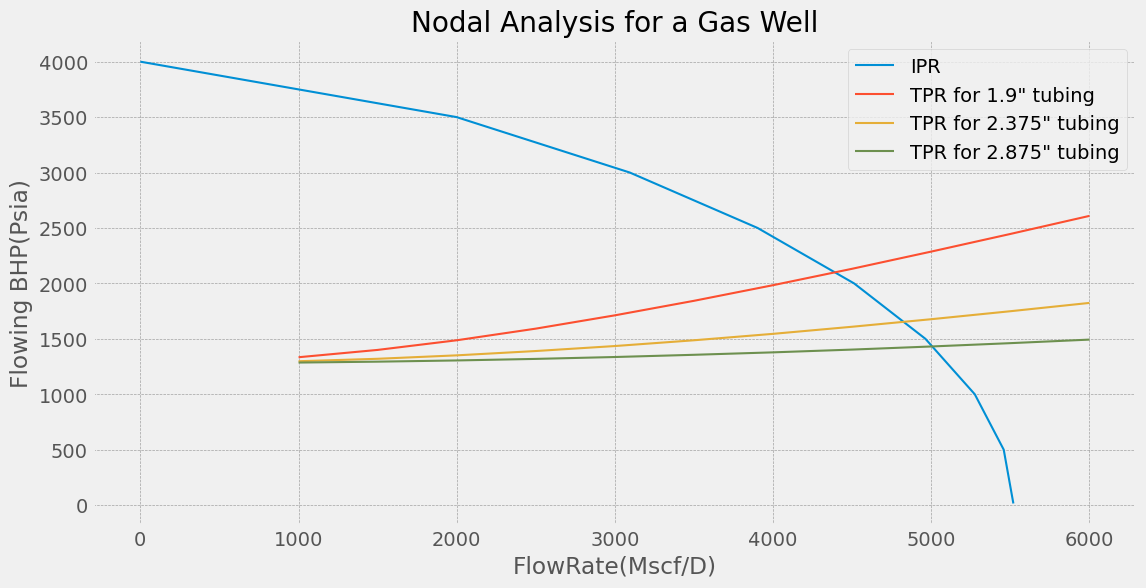

In [49]:
#Let's Plot them now. 
plt.figure(figsize=(12,6))

plt.style.use('fivethirtyeight')

plt.plot(ipr['Q'], ipr['Pwf'], label = 'IPR', linewidth=1.5)

plt.plot(tpr['q'],tpr['Pwf(1.90" tbg)'],label='TPR for 1.9" tubing', linewidth=1.5)
plt.plot(tpr['q'],tpr['Pwf(2.375" tbg)'],label='TPR for 2.375" tubing', linewidth=1.5)
plt.plot(tpr['q'],tpr['Pwf(2.875" tbg)'],label='TPR for 2.875" tubing', linewidth=1.5)

plt.xlabel('FlowRate(Mscf/D)')
plt.ylabel('Flowing BHP(Psia)')
plt.title('Nodal Analysis for a Gas Well')

plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)

plt.legend(loc='best')

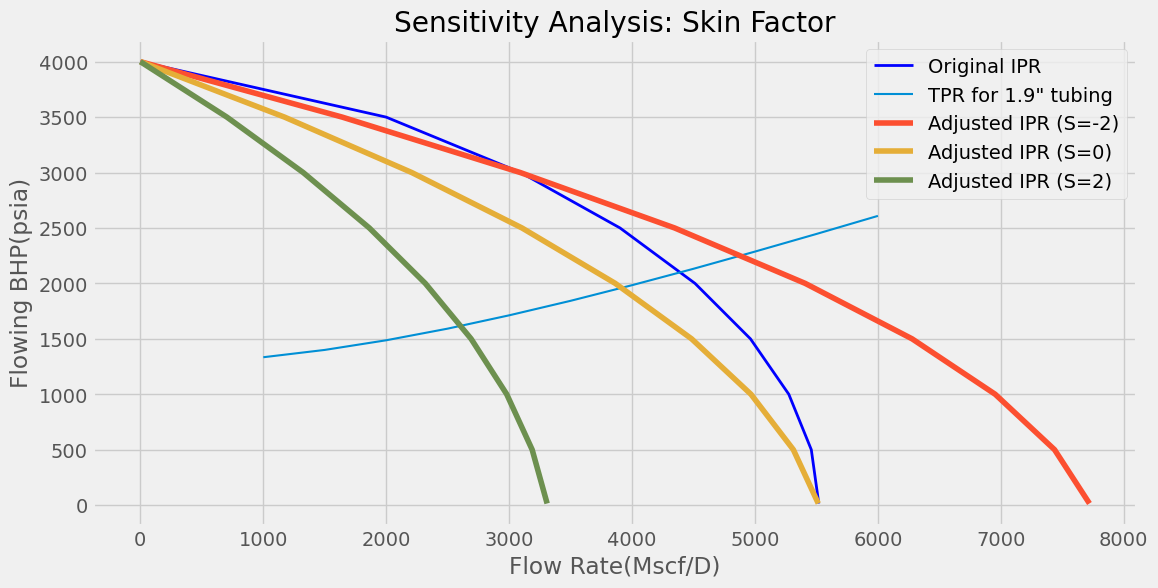

In [68]:
# Function to adjust IPR for skin factor (non-linear adjustment)
def adjust_ipr_with_skin(q, pwf, S):
    q_max_adj = max(q) * (1 - 0.2 * S)  # Adjust max flow rate based on skin factor
    return q_max_adj * (1 - 0.2 * (np.array(pwf) / max(pwf)) - 0.8 * (np.array(pwf) / max(pwf))**2)

# Skin factors to test
skin_factors = [-2, 0, 2]

# Plotting the original IPR curve and TPR for 1.9" tbg
plt.figure(figsize=(12, 6))
plt.plot(ipr['Q'], ipr['Pwf'], label='Original IPR', linestyle='-', color='b', linewidth=2)
plt.plot(tpr['q'],tpr['Pwf(1.90" tbg)'],label='TPR for 1.9" tubing', linewidth=1.5)


# Loop over the different skin factors and plot their adjusted IPR curves
for S in skin_factors:
    adjusted_q_ipr = adjust_ipr_with_skin(q_ipr, pwf_ipr, S)
    plt.plot(adjusted_q_ipr, pwf_ipr, label=f'Adjusted IPR (S={S})', linestyle='-')

# Labels and Title
plt.xlabel('Flow Rate(Mscf/D)')
plt.ylabel('Flowing BHP(psia)')
plt.title('Sensitivity Analysis: Skin Factor')
plt.legend()

# Display the plot
plt.grid(True)
plt.show()

# Darcy's Law for Reservoir Pressure Profiling with Python

How pressure profile changes when you change different parameters in Darcy's Law

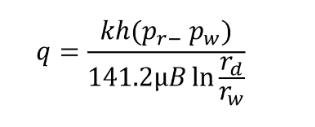
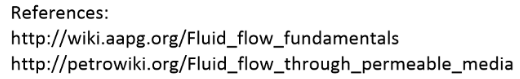

## How Pressure Profile Changes When You Modify Different Parameters

### Viscosity

From Darcy's Law, you can see that as viscosity increases, the pressure difference (ΔP) increases, causing the pressure at any given radius r to be higher for more viscous fluids. This is because a more viscous fluid has more resistance to flow, requiring higher pressure to maintain the same flow rate.
Therefore, increasing μ will result in a steeper pressure drop near the wellbore and a higher pressure at all points in the reservoir.

Try 3 different cases for viscosity values: 15, 35, 60

In [147]:
r = np.linspace(1,3000,num=50)

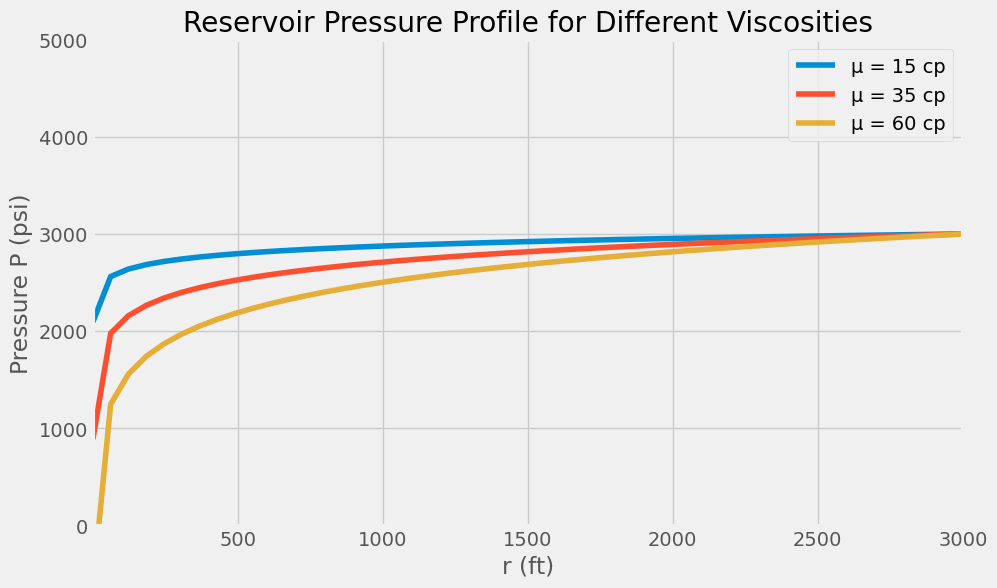

In [156]:
q = 200  # STB/d
B = 1.2  # bbl/STB
k = 150  # mD
h = 30  # ft
Pe = 3000  # psi
rw = 0.5  # ft

# Viscosity values for cases. You can experiment changing these values
mu_values = [15,35,60]  # viscosities (cp)

plt.figure(figsize=(10, 6))

# Loop through viscosity values
for mu in mu_values:
    DP = (141.2 * q * mu * B / (k * h)) * np.log(3000/ r)  # Pressure drop
    P = Pe - DP  # Reservoir pressure profile
    plt.plot(r, P, label=f'μ = {mu} cp')

# Plot settings
plt.xlim(1, 3000)
plt.ylim(0, 5000)
plt.xlabel('r (ft)')
plt.ylabel('Pressure P (psi)')
plt.title('Reservoir Pressure Profile for Different Viscosities')
plt.legend()
plt.grid(True)
plt.show()

### Permeability (k):

Increasing the permeability of the reservoir means that the fluid can flow more easily through the rock, reducing the pressure difference for the same flow rate.
Therefore, increasing 𝑘 will result in a less steep pressure drop, and pressures in the reservoir will be lower compared to a reservoir with lower permeability.

Try 3 different cases for permeability values: 10,50,250

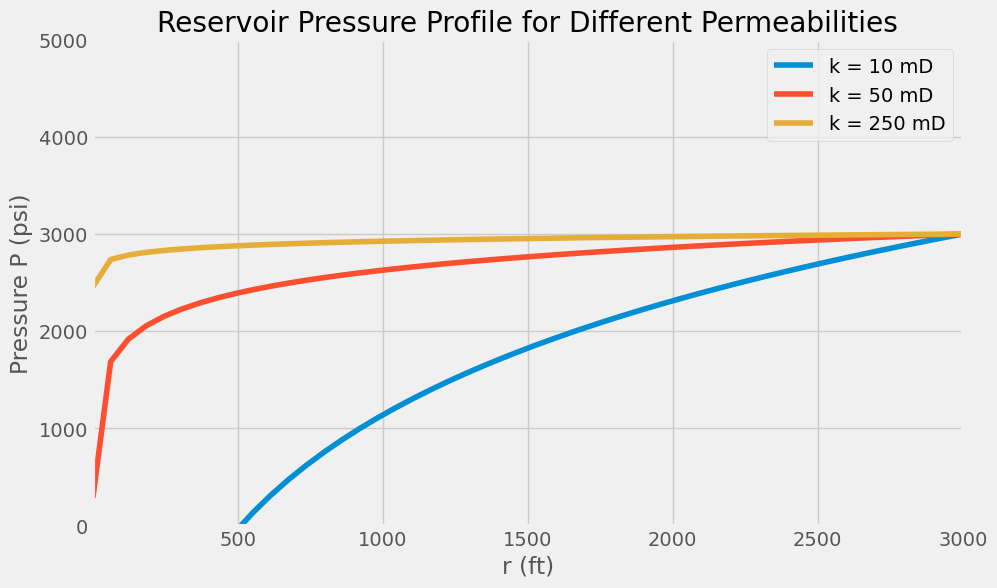

In [165]:
q = 200  # STB/d
B = 1.2  # bbl/STB
h = 30  # ft
Pe = 3000  # psi
rw = 0.5  # ft
u = 15 #cp

# Viscosity values for cases. You can experiment changing these values
k_values = [10,50,250]  # viscosities (cp)

plt.figure(figsize=(10, 6))

# Loop through viscosity values
for k in k_values:
    DP = (141.2 * q * u * B / (k * h)) * np.log(3000/ r)  # Pressure drop
    P = Pe - DP  # Reservoir pressure profile
    plt.plot(r, P, label=f'k = {k} mD')

# Plot settings
plt.xlim(1, 3000)
plt.ylim(0, 5000)
plt.xlabel('r (ft)')
plt.ylabel('Pressure P (psi)')
plt.title('Reservoir Pressure Profile for Different Permeabilities')
plt.legend()
plt.grid(True)
plt.show()

# Relative Permeability Plots

Permeability: It measures how easily fluids (like oil, water, or gas) can flow through a porous rock.

Relative Permeability: When two or more fluids (e.g., oil + water) flow together, each fluid's ability to flow is reduced because the fluids compete for space in the pores.

Relative permeability is the fraction of absolute permeability available for each fluid.
It is dimensionless (values range from 0 to 1).

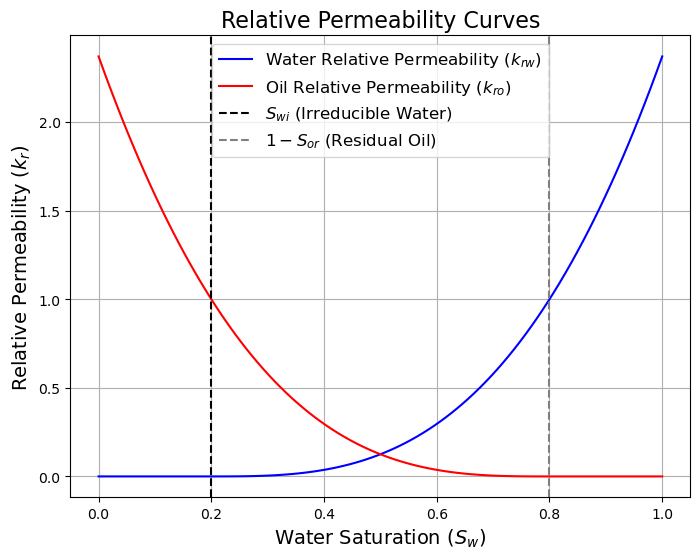

In [178]:
# Saturation range
Sw = np.linspace(0, 1, 100)  # Water saturation (0 to 100%)

# Parameters
Swi = 0.2  # Irreducible water saturation
Sor = 0.2  # Residual oil saturation
Sw_eff = (Sw - Swi) / (1 - Swi - Sor)  # Effective water saturation (normalized)

# Relative permeability equations (Corey-type model)
Krw = Sw_eff**3  # Relative permeability of water
Kro = (1 - Sw_eff)**3  # Relative permeability of oil

# Handle values outside the valid range
Krw[Sw < Swi] = 0
Kro[Sw > (1 - Sor)] = 0

# Plot
plt.figure(figsize=(8, 6))
plt.plot(Sw, Krw, label="Water Relative Permeability ($k_{rw}$)", color="blue")
plt.plot(Sw, Kro, label="Oil Relative Permeability ($k_{ro}$)", color="red")
plt.axvline(Swi, color="black", linestyle="--", label="$S_{wi}$ (Irreducible Water)")
plt.axvline(1 - Sor, color="gray", linestyle="--", label="$1-S_{or}$ (Residual Oil)")

# Labels and legends
plt.title("Relative Permeability Curves", fontsize=16)
plt.xlabel("Water Saturation ($S_w$)", fontsize=14)
plt.ylabel("Relative Permeability ($k_r$)", fontsize=14)
plt.grid(True)
plt.legend(fontsize=12)
plt.show()


##
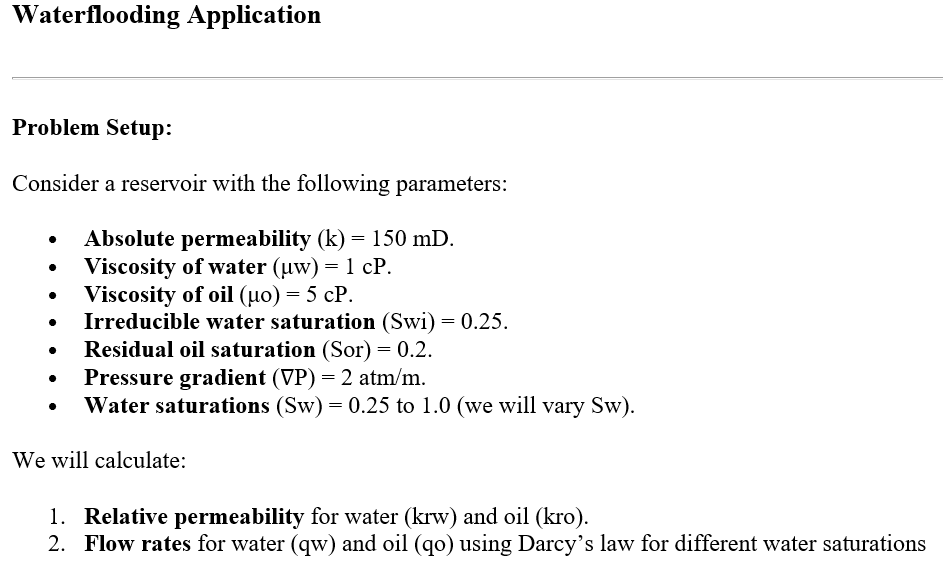

In [184]:
k = 150
mu_w = 1  
mu_o = 5  
nabla_P = 2  
Swi = 0.25  
Sor = 0.2  

# Water saturations from Swi to 1.0
Sw = np.linspace(Swi, 1.0, 100)

# Effective water saturation
S_w_eff = (Sw - Swi) / (1 - Swi - Sor)

# Relative permeabilities
k_rw = np.where(Sw >= Swi, S_w_eff**3, 0)
k_ro = np.where(Sw >= Swi, (1 - S_w_eff)**3, 0)

# Flow rates using Darcy's law
q_w = k_rw * k / mu_w * nabla_P  # Water flow rate
q_o = k_ro * k / mu_o * nabla_P  # Oil flow rate

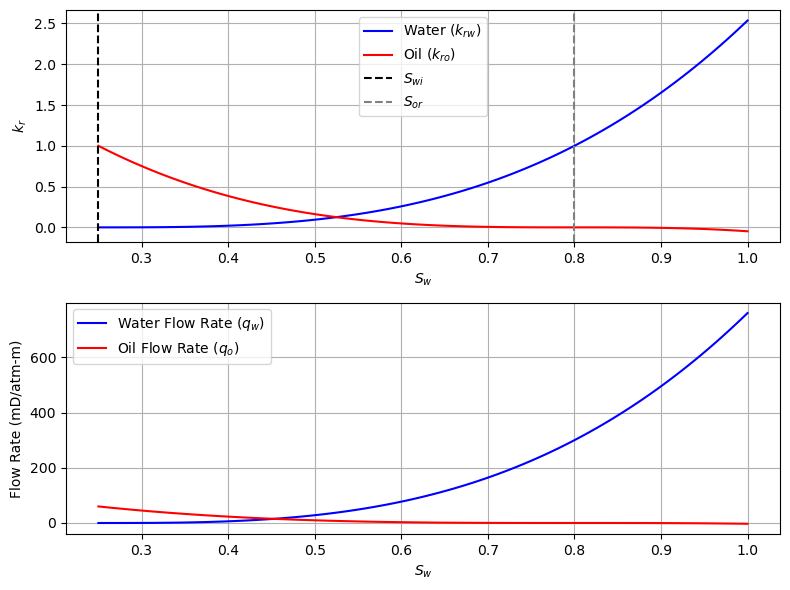

In [187]:
plt.figure(figsize=(8, 6))

# Plot relative permeability curves
plt.subplot(2, 1, 1)
plt.plot(Sw, k_rw, label="Water ($k_{rw}$)", color="blue")
plt.plot(Sw, k_ro, label="Oil ($k_{ro}$)", color="red")
plt.axvline(Swi, color="black", linestyle="--", label="$S_{wi}$")
plt.axvline(1 - Sor, color="gray", linestyle="--", label="$S_{or}$")
plt.xlabel("$S_w$")
plt.ylabel("$k_r$")
plt.legend()
plt.grid(True)

# Plot flow rates
plt.subplot(2, 1, 2)
plt.plot(Sw, q_w, label="Water Flow Rate ($q_w$)", color="blue")
plt.plot(Sw, q_o, label="Oil Flow Rate ($q_o$)", color="red")
plt.xlabel("$S_w$")
plt.ylabel("Flow Rate (mD/atm-m)")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


### Interpretation
1. Relative Permeability Curves
- At lower water saturation (𝑆𝑤), oil has higher relative permeability and flows more easily.
- As (Sw) increases (more water), the relative permeability of oil decreases, and the relative permeability of water increases.
3. Flow Rate Curves
- Water flow rate (𝑞𝑤) increases as more water fills the pore spaces, and oil becomes less mobile.
- Oil flow rate (𝑞𝑜) decreases as water saturates the reservoir, displacing oil.

# Reservoir Volumetric Calculations

In [176]:
# Function Definitions
def calculate_stoiip(area, thickness, porosity, water_saturation, formation_volume_factor):
    """
    Calculate Stock Tank Oil Initially in Place (STOIIP).
    """
    return (7758 * area * thickness * porosity * (1 - water_saturation)) / formation_volume_factor


def calculate_giip(area, thickness, porosity, water_saturation, gas_saturation, formation_volume_factor):
    """
    Calculate Gas Initially in Place (GIIP).
    """
    return (43560 * area * thickness * porosity * gas_saturation) / formation_volume_factor


def calculate_ooip(area, thickness, porosity, oil_saturation, formation_volume_factor):
    """
    Calculate Oil Originally in Place (OOIP).
    """
    return (7758 * area * thickness * porosity * oil_saturation) / formation_volume_factor

# User Interaction Menu
def volumetric_calculations_menu():
    print("""
    Select a volumetric calculation:
    1. STOIIP (Stock Tank Oil Initially in Place)
    2. GIIP (Gas Initially in Place)
    3. OOIP (Oil Originally in Place)
    """)
    choice = int(input("Enter your choice (1-3): "))
    return choice

# Main Calculation Logic
def main():
    choice = volumetric_calculations_menu()
    
    if choice == 1:
        # STOIIP Calculation
        area = float(input("Enter reservoir area (acres): "))
        thickness = float(input("Enter reservoir thickness (feet): "))
        porosity = float(input("Enter porosity (fraction): "))
        water_saturation = float(input("Enter water saturation (fraction): "))
        formation_volume_factor = float(input("Enter formation volume factor (RB/STB): "))
        result = calculate_stoiip(area, thickness, porosity, water_saturation, formation_volume_factor)
        print(f"\nThe STOIIP is: {result:,.2f} STB")
    
    elif choice == 2:
        # GIIP Calculation
        area = float(input("Enter reservoir area (acres): "))
        thickness = float(input("Enter reservoir thickness (feet): "))
        porosity = float(input("Enter porosity (fraction): "))
        water_saturation = float(input("Enter water saturation (fraction): "))
        gas_saturation = 1 - water_saturation
        formation_volume_factor = float(input("Enter formation volume factor (RB/SCF): "))
        result = calculate_giip(area, thickness, porosity, water_saturation, gas_saturation, formation_volume_factor)
        print(f"\nThe GIIP is: {result:,.2f} SCF")
    
    elif choice == 3:
        # OOIP Calculation
        area = float(input("Enter reservoir area (acres): "))
        thickness = float(input("Enter reservoir thickness (feet): "))
        porosity = float(input("Enter porosity (fraction): "))
        oil_saturation = float(input("Enter oil saturation (fraction): "))
        formation_volume_factor = float(input("Enter formation volume factor (RB/STB): "))
        result = calculate_ooip(area, thickness, porosity, oil_saturation, formation_volume_factor)
        print(f"\nThe OOIP is: {result:,.2f} STB")
    
    else:
        print("Invalid choice! Please select a valid option.")

# Run the program
if __name__ == "__main__":
    main()



    Select a volumetric calculation:
    1. STOIIP (Stock Tank Oil Initially in Place)
    2. GIIP (Gas Initially in Place)
    3. OOIP (Oil Originally in Place)
    


Enter your choice (1-3):  1
Enter reservoir area (acres):  4500
Enter reservoir thickness (feet):  82
Enter porosity (fraction):  0.20
Enter water saturation (fraction):  0.15
Enter formation volume factor (RB/STB):  1.65



The STOIIP is: 294,945,054.55 STB
